In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canola-dataset/.xlsx


In [2]:
import pandas as pd

# Load the Excel file
file_path = '/kaggle/input/canola-dataset/.xlsx'  # Update this path
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the Excel file
sheet_names = excel_data.sheet_names
print(sheet_names)

# Load a specific sheet into a dataframe
df = pd.read_excel(file_path, sheet_name=sheet_names[0])  # Update sheet name if necessary
print(df.head())


['Sheet1']
   R  I  G  Height to 1st Branch  No. of Branch  No. of pods  Oil %  \
0  1  1  1                 31.20           4.20   253.333333   44.4   
1  1  1  2                 27.00           4.00   217.400000   45.0   
2  1  1  3                 35.25           4.00   176.500000   43.2   
3  1  1  4                 30.33           6.30   177.670000   43.5   
4  1  1  5                 29.00           5.25   189.800000   43.0   

   Protein %     SI  Yield/f (t)  SY/PL(g) Unnamed: 11  
0       25.6  3.580      1.89000   22.8000          Ha  
1       25.7  3.405      2.03079   19.5660          Hb  
2       24.0  3.935      2.00000   15.8850          Hc  
3       24.2  4.940      2.05000   15.9903          Hd  
4       26.0  3.595      1.86000   17.0820          He  


In [3]:
df

,R,I,G,Height to 1st Branch,No. of Branch,No. of pods,Oil %,Protein %,SI,Yield/f (t),SY/PL(g),Unnamed: 11
0,1,1,1,31.20,4.20,253.333333,44.4,25.6,3.580,1.89000,22.8000,Ha
1,1,1,2,27.00,4.00,217.400000,45.0,25.7,3.405,2.03079,19.5660,Hb
2,1,1,3,35.25,4.00,176.500000,43.2,24.0,3.935,2.00000,15.8850,Hc
3,1,1,4,30.33,6.30,177.670000,43.5,24.2,4.940,2.05000,15.9903,Hd
4,1,1,5,29.00,5.25,189.800000,43.0,26.0,3.595,1.86000,17.0820,He
...,...,...,...,...,...,...,...,...,...,...,...,...
73,3,2,9,16.60,3.20,183.800000,44.2,23.9,3.295,1.57626,12.8660,Hi
74,3,2,10,30.60,3.60,177.600000,44.4,23.8,3.480,1.77000,12.4320,Hj
75,3,2,11,23.00,2.50,194.000000,43.5,25.1,3.330,1.70000,13.5800,Hk
76,3,2,12,23.20,3.00,138.750000,44.0,23.7,3.295,1.45950,9.7125,Hl


In [4]:
df.info

<bound method DataFrame.info of     R  I   G  Height to 1st Branch  No. of Branch  No. of pods  Oil %  \
0   1  1   1                 31.20           4.20   253.333333   44.4   
1   1  1   2                 27.00           4.00   217.400000   45.0   
2   1  1   3                 35.25           4.00   176.500000   43.2   
3   1  1   4                 30.33           6.30   177.670000   43.5   
4   1  1   5                 29.00           5.25   189.800000   43.0   
.. .. ..  ..                   ...            ...          ...    ...   
73  3  2   9                 16.60           3.20   183.800000   44.2   
74  3  2  10                 30.60           3.60   177.600000   44.4   
75  3  2  11                 23.00           2.50   194.000000   43.5   
76  3  2  12                 23.20           3.00   138.750000   44.0   
77  3  2  13                 22.20           3.00   166.000000   44.6   

    Protein %     SI  Yield/f (t)  SY/PL(g) Unnamed: 11  
0        25.6  3.580      1.89000

In [5]:
df.describe()

,R,I,G,Height to 1st Branch,No. of Branch,No. of pods,Oil %,Protein %,SI,Yield/f (t),SY/PL(g)
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2.000000,1.500000,7.000000,25.818598,3.763077,193.071196,43.866667,24.730769,3.366603,1.781715,15.463524
std,0.821781,0.503236,3.765875,6.021817,0.741790,36.876469,0.962635,0.895198,0.438821,0.236281,3.425128
min,1.000000,1.000000,1.000000,12.250000,2.400000,122.200000,41.300000,22.400000,2.180000,1.338570,8.554000
25%,1.000000,1.000000,4.000000,21.675000,3.400000,168.650000,43.300000,24.000000,3.120000,1.639853,12.542967
50%,2.000000,1.500000,7.000000,25.465000,3.685000,184.000000,43.850000,24.800000,3.337500,1.770000,15.542000
75%,3.000000,2.000000,10.000000,30.000000,4.000000,218.432000,44.600000,25.375000,3.587500,1.904895,17.176000
max,3.000000,2.000000,13.000000,41.000000,6.300000,344.200000,45.600000,26.700000,4.940000,2.476980,27.536000


In [6]:
# Filter rows where 'Oil %' is greater than 44
filtered_df = df[df['Oil %'] > 44]

# Display the filtered DataFrame
print(filtered_df.head())

   R  I   G  Height to 1st Branch  No. of Branch  No. of pods  Oil %  \
0  1  1   1                 31.20           4.20   253.333333   44.4   
1  1  1   2                 27.00           4.00   217.400000   45.0   
7  1  1   8                 28.75           3.75   225.750000   45.1   
8  1  1   9                 35.25           4.80   228.800000   44.8   
9  1  1  10                 30.00           3.50   203.333333   45.0   

   Protein %     SI  Yield/f (t)  SY/PL(g) Unnamed: 11  
0       25.6  3.580      1.89000   22.8000          Ha  
1       25.7  3.405      2.03079   19.5660          Hb  
7       25.3  3.900      2.00000   20.3175          Hh  
8       25.4  3.205      2.08500   20.5920          Hi  
9       25.0  3.450      2.18091   18.3000          Hj  


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     7.529
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           2.59e-06
Time:                        16:53:07   Log-Likelihood:                 27.411
No. Observations:                  62   AIC:                            -38.82
Df Residuals:                      54   BIC:                            -21.80
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7151 

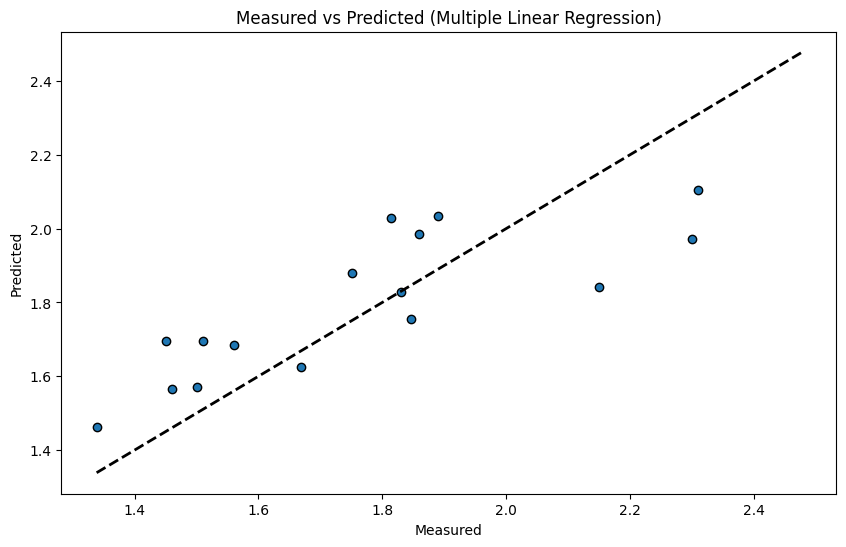

   Block  Main Plot  Sub Plot  Mean Yield
0  False      False     False    1.837641
1  False      False      True    1.860395
2  False       True     False    1.730445
3  False       True      True    1.588770
4   True      False     False    1.829474
5   True      False      True    1.847310
6   True       True     False    1.740053
7   True       True      True    1.759740
Sub Plot            False     True 
Block Main Plot                    
False False      1.837641  1.860395
      True       1.730445  1.588770
True  False      1.829474  1.847310
      True       1.740053  1.759740


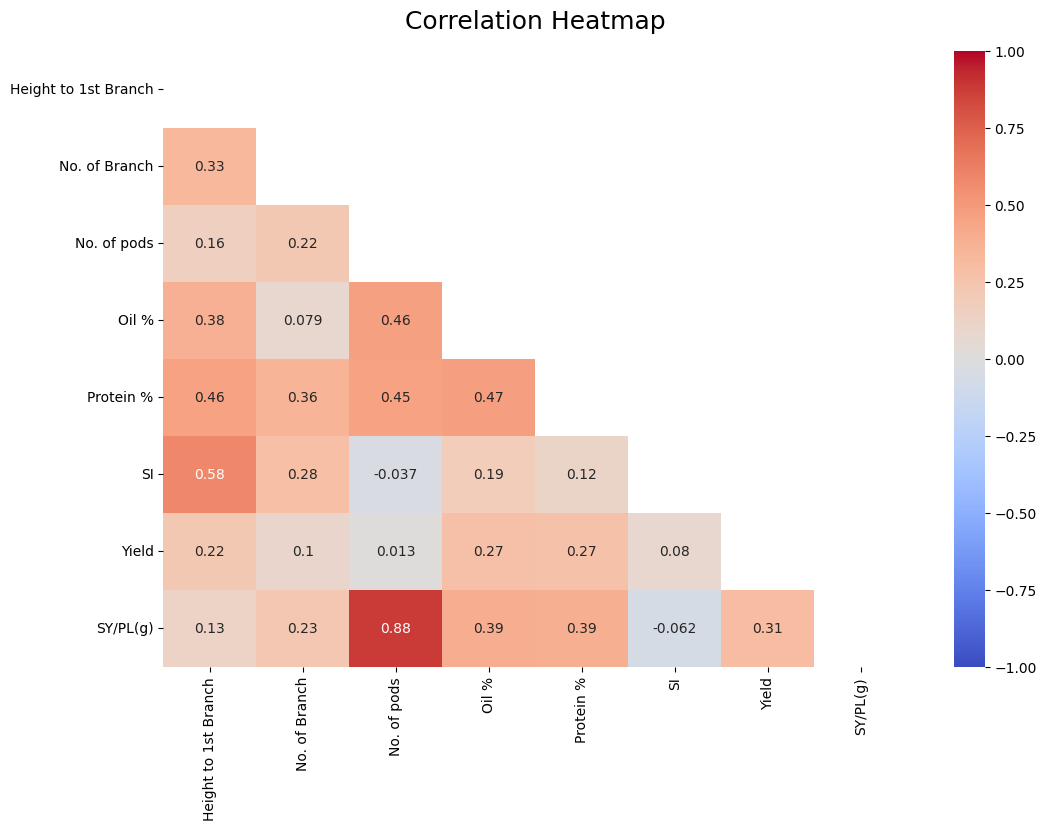

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the Excel file
file_path = '/kaggle/input/canola-dataset/.xlsx'  # Update this path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Data preparation: ensure correct data types and drop any irrelevant columns
if 'Unnamed: 11' in df.columns:
    df.drop(columns=['Unnamed: 11'], inplace=True)

df.rename(columns={'Yield/f (t)': 'Yield'}, inplace=True)
df = df.astype({'R': 'category', 'I': 'category', 'G': 'category'})

# Replace values in column 'I'
df['I'] = df['I'].cat.rename_categories({1: 'i1', 2: 'i2'})

# Convert categorical variables to one-hot encoding
df = pd.get_dummies(df, columns=['R', 'I', 'G'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['Yield'])
y = df['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to the model (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Columns to drop (from your previous list)
cols_to_drop = ['R_2', 'R_3', 'I_i2', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_9', 'G_10', 'G_11', 'G_12', 'G_13']

# Drop the columns for the model
X_train_reduced = X_train.drop(columns=[col for col in cols_to_drop if col in X_train.columns])
X_test_reduced = X_test.drop(columns=[col for col in cols_to_drop if col in X_test.columns])

# Multiple Linear Regression using statsmodels
model = sm.OLS(y_train.astype(float), X_train_reduced.astype(float)).fit()
predictions = model.predict(X_test_reduced.astype(float))

# Print out the statistics
print(model.summary())

# Calculate and print the R^2 and Mean Squared Error
print("R^2:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted (Multiple Linear Regression)')
plt.show()

# Calculate and display the means of Yield for each combination of block, main_plot, and sub_plot
means = df.groupby(['R_2', 'I_i2', 'G_2'])['Yield'].mean().reset_index()
means.columns = ['Block', 'Main Plot', 'Sub Plot', 'Mean Yield']
print(means)

# Pivot the table for better readability
pivot_table = means.pivot_table(values='Mean Yield', index=['Block', 'Main Plot'], columns='Sub Plot')
print(pivot_table)

# Compute the correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the Excel file
file_path = '/kaggle/input/canola-dataset/.xlsx'  
df = pd.read_excel(file_path, sheet_name='Sheet1') 

# Data preparation: ensure correct data types and drop any irrelevant columns
df.drop(columns=['Unnamed: 11'], inplace=True)
df = df.astype({'R': 'category', 'I': 'category', 'G': 'category'})


# Rename columns for simplicity
df.rename(columns={'Yield/f (t)': 'Yield'}, inplace=True)
# Replace values in column 'I'
df['I'] = df['I'].cat.rename_categories({1: 'i1', 2: 'i2'})

# Rename columns for simplicity
df.rename(columns={'Yield/f (t)': 'Yield'}, inplace=True)

ANOVA Results:
  sum_sq   df         F       PR(>F)    means
1.866597  2.0 68.463212 4.813741e-15 1.781715
0.234477  1.0 17.200356 1.301692e-04 1.781715
1.426951 12.0  8.722973 1.217676e-08 1.781715
0.089188 12.0  0.545206 8.740620e-01 1.781715
0.681606 50.0       NaN          NaN 1.781715

Means:
block main_plot sub_plot   Yield
    1        I1        1 1.89000
    1        I1       10 2.18091
    1        I1       11 2.31000
    1        I1       12 2.47698
    1        I1       13 1.81395
    1        I1        2 2.03079
    1        I1        3 2.00000
    1        I1        4 2.05000
    1        I1        5 1.86000
    1        I1        6 1.91000
    1        I1        7 1.78000
    1        I1        8 2.00000
    1        I1        9 2.08500
    1        I2        1 1.49286
    1        I2       10 2.18091
    1        I2       11 2.30000
    1        I2       12 2.21844
    1        I2       13 1.70553
    1        I2        2 1.83897
    1        I2        3 1.90986
    1   

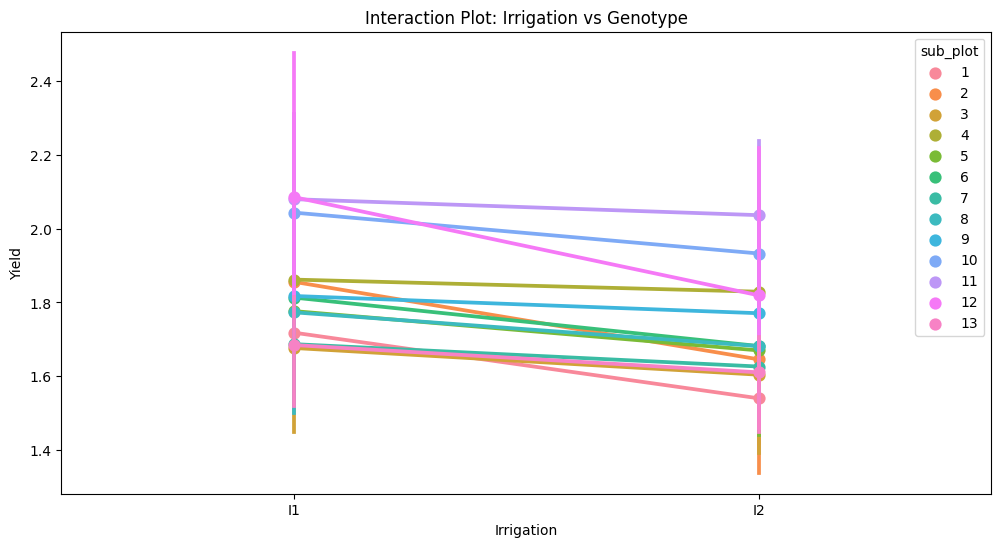

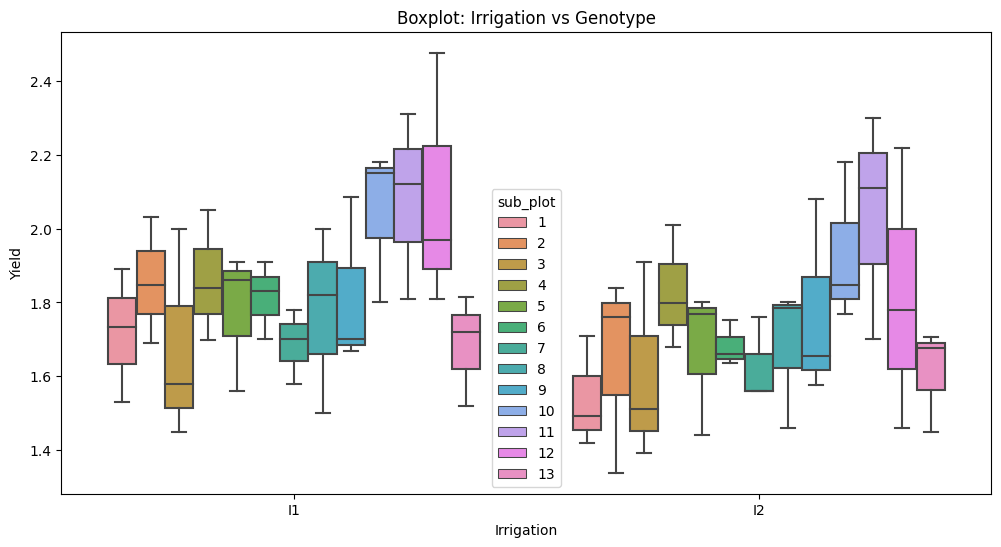

In [9]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/kaggle/input/canola-dataset/.xlsx'  
df = pd.read_excel(file_path, sheet_name='Sheet1') 

# Data preparation: ensure correct data types and drop any irrelevant columns
df.drop(columns=['Unnamed: 11'], inplace=True)
df = df.astype({'R': 'category', 'I': 'category', 'G': 'category'})

df.rename(columns={'Yield/f (t)': 'Yield'}, inplace=True)
df['I'] = df['I'].cat.rename_categories({1: 'I1', 2: 'I2'})

# Define main plot and subplot factors
blocks = df['R'].unique()
main_plots = df['I'].unique()
sub_plots = df['G'].unique()

# Assigning a split-plot design
df['block'] = df['R']
df['main_plot'] = df['I']
df['sub_plot'] = df['G']

# Perform ANOVA for split-plot design
# Formula for ANOVA: Yield ~ block + main_plot + sub_plot + main_plot:sub_plot

# Convert categorical data to string for ANOVA
df['block'] = df['block'].astype(str)
df['main_plot'] = df['main_plot'].astype(str)
df['sub_plot'] = df['sub_plot'].astype(str)

# Fit the model
model = ols('Yield ~ block + main_plot + sub_plot + main_plot:sub_plot', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)

# Calculate the means of Yield for each combination of block, main_plot, and sub_plot
means = df.groupby(['block', 'main_plot', 'sub_plot'])['Yield'].mean().reset_index()

# Merge the means with ANOVA results
anova_results['means'] = [means['Yield'].mean()] * len(anova_results)

# Customize the display of ANOVA results
print("ANOVA Results:")
print("===================")
print(anova_results.to_string(index=False))
print()

# Display the means
print("Means:")
print("===============")
print(means.to_string(index=False))
print()

# Pivot the table for better readability
pivot_table = means.pivot_table(values='Yield', index=['block', 'main_plot'], columns='sub_plot')
print("Means Pivot Table:")
print("===================")
print(pivot_table)
print()

# Visualize the results
# Interaction plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='main_plot', y='Yield', hue='sub_plot', data=df)
plt.title('Interaction Plot: Irrigation vs Genotype')
plt.xlabel('Irrigation')
plt.ylabel('Yield')
plt.show()

# Boxplot for main plot and subplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_plot', y='Yield', hue='sub_plot', data=df)
plt.title('Boxplot: Irrigation vs Genotype')
plt.xlabel('Irrigation')
plt.ylabel('Yield')
plt.show()


In [10]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the ANOVA model
model = ols('Yield ~ C(R) + C(I) + C(G) + C(I):C(G)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)
print(anova_results)


             sum_sq    df          F        PR(>F)
C(R)       1.866597   2.0  68.463212  4.813741e-15
C(I)       0.234477   1.0  17.200356  1.301692e-04
C(G)       1.426951  12.0   8.722973  1.217676e-08
C(I):C(G)  0.089188  12.0   0.545206  8.740620e-01
Residual   0.681606  50.0        NaN           NaN
